# Importing Packages


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


#Loading the data


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')
df_train.head(10) #importing the dataset

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


#Reading the data

In [ ]:
print(df_train.shape) #checking the shape of the dataset
print("There are 1000 observations and 9 variables in our dataset") #printing the shape of the dataset

(1000, 9)
There are 1000 observations and 9 variables in our dataset


In [ ]:
df_train.head() #checking the first 5 rows of the dataset

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df_train.tail() #checking the last 5 rows of the dataset

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
df_train.info() #checking the data types of the variables
print("Display the data types of the variables")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
Display the data types of the variables


df_train.info() shows that:
 Numeric variables like Transation ID, Age are of datatype int64. Categorical variables like Customer ID, Gender are of object data type

In [ ]:
df_train.nunique() #checking the number of unique values in each variable

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


In [ ]:
df_train.isnull().sum() #checking the number of missing values in each variable

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


There are no missing values in the dataset.

In [ ]:
print(df_train['Product Category'].unique()) #checking the unique values in the Product Category variable
print(df_train['Product Category'].nunique()) #checking the number of unique values in the Product Category variable

['Beauty' 'Clothing' 'Electronics']
3


# Data cleaning

In [ ]:
df_train =pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')
df = pd.DataFrame(df_train)

# Removing duplicates
df = df.drop_duplicates()

# Display the cleaned data
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [ ]:
# Display the original size of the dataset
original_size = df_train
print(f"Original DataFrame size: {original_size}")

# Remove duplicates based on all columns
df_cleaned_all_columns = df.drop_duplicates()

# Size after removing duplicates based on all columns
size_after_all_columns = df_cleaned_all_columns.shape
print(f"Size after removing duplicates (based on all columns): {size_after_all_columns}")

Original DataFrame size:      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0   

The sizes of the DataFrame before and after removing duplicates are the same, which suggests there were no duplicate rows in the dataset.


In [ ]:
# Missing Values
data = ['Transaction ID','Age','Quantity','Price per Unit','Total Amount']
df = pd.DataFrame(df_train)

# Fill missing values with the mean
df[data] = df[data].fillna(value=df[data].mean(), inplace=False) # Use a list to select multiple columns
print("Fill with mean:\n", df)



Fill with mean:
      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           

All columns are free of null values.

In [ ]:
# Outliers
data = ['Transaction ID','Age','Quantity','Price per Unit','Total Amount']
df = pd.DataFrame(df_train)


# Calculating IQR
Q1 = df[data].quantile(0.25)
Q3 = df[data].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering outliers
outliers = df[(df[data] < lower_bound) | (df[data] > upper_bound)]

print("Outliers:\n", outliers)

Outliers:
      Transaction ID Date Customer ID Gender  Age Product Category  Quantity  \
0               NaN  NaN         NaN    NaN  NaN              NaN       NaN   
1               NaN  NaN         NaN    NaN  NaN              NaN       NaN   
2               NaN  NaN         NaN    NaN  NaN              NaN       NaN   
3               NaN  NaN         NaN    NaN  NaN              NaN       NaN   
4               NaN  NaN         NaN    NaN  NaN              NaN       NaN   
..              ...  ...         ...    ...  ...              ...       ...   
995             NaN  NaN         NaN    NaN  NaN              NaN       NaN   
996             NaN  NaN         NaN    NaN  NaN              NaN       NaN   
997             NaN  NaN         NaN    NaN  NaN              NaN       NaN   
998             NaN  NaN         NaN    NaN  NaN              NaN       NaN   
999             NaN  NaN         NaN    NaN  NaN              NaN       NaN   

     Price per Unit  Total Amount  
0   

#Descriptive Statistics

In [ ]:
df_train.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
print(df_train[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode())


   Age  Quantity  Price per Unit  Total Amount
0   43       4.0            50.0          50.0
1   64       NaN             NaN           NaN


Transaction ID
Skew : 0.0


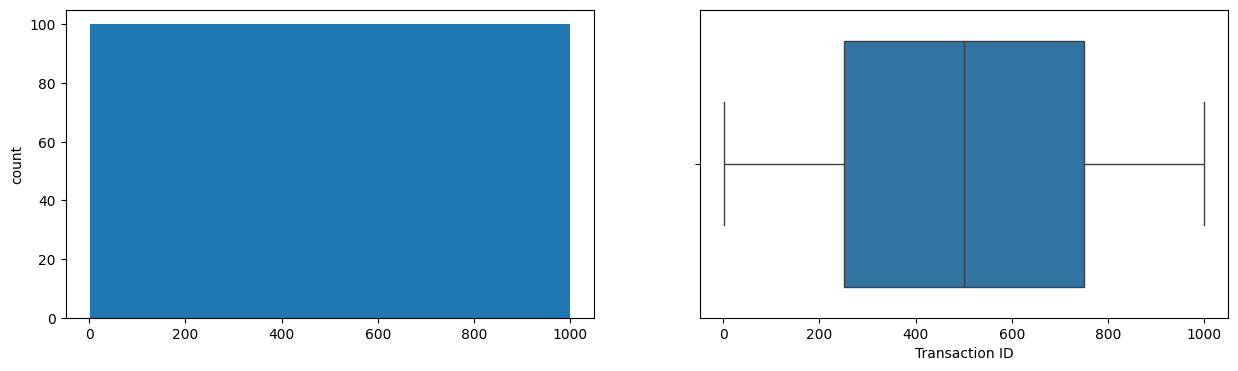

Age
Skew : -0.05


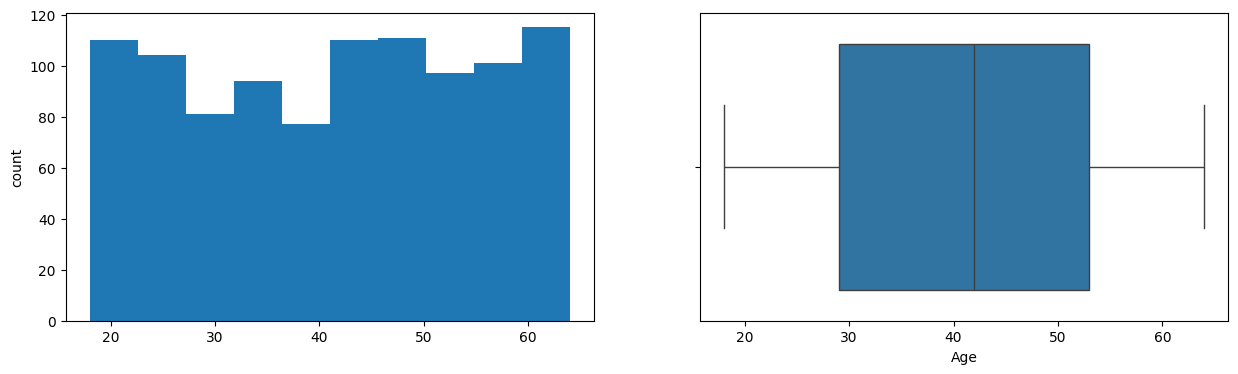

Quantity
Skew : -0.01


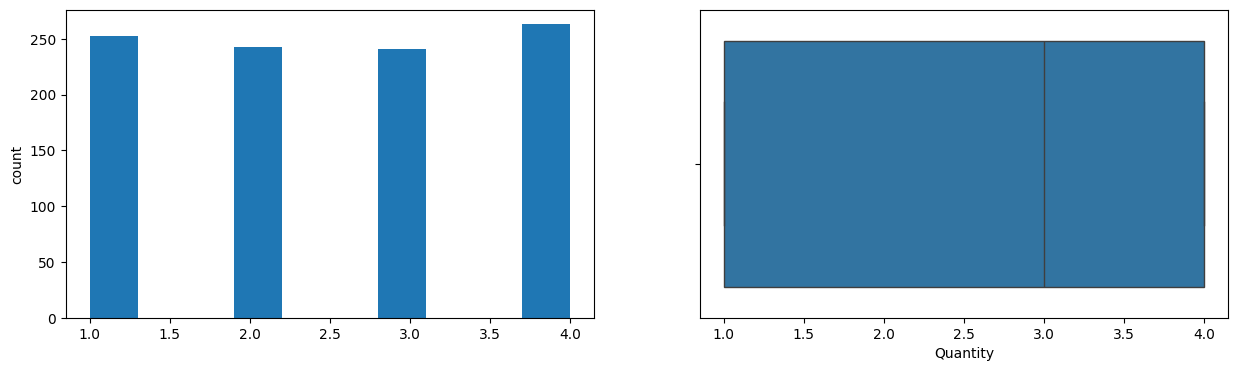

Price per Unit
Skew : 0.74


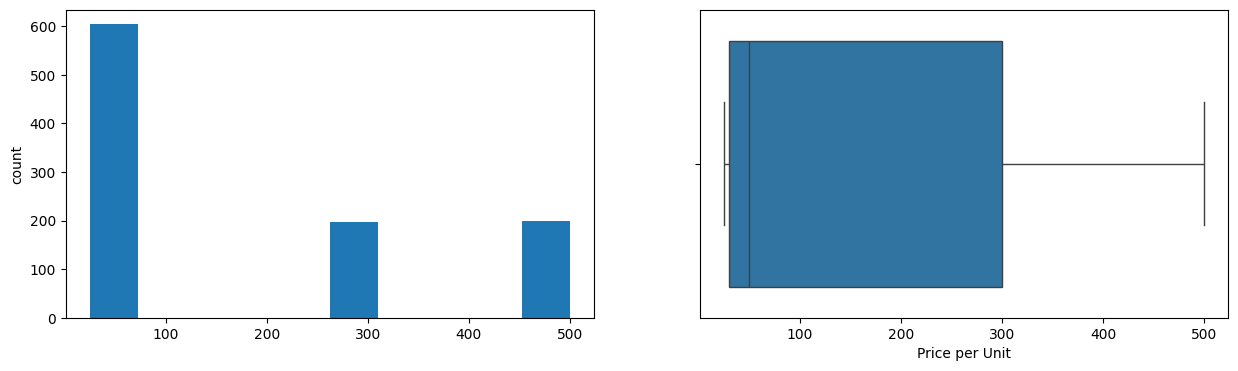

Total Amount
Skew : 1.38


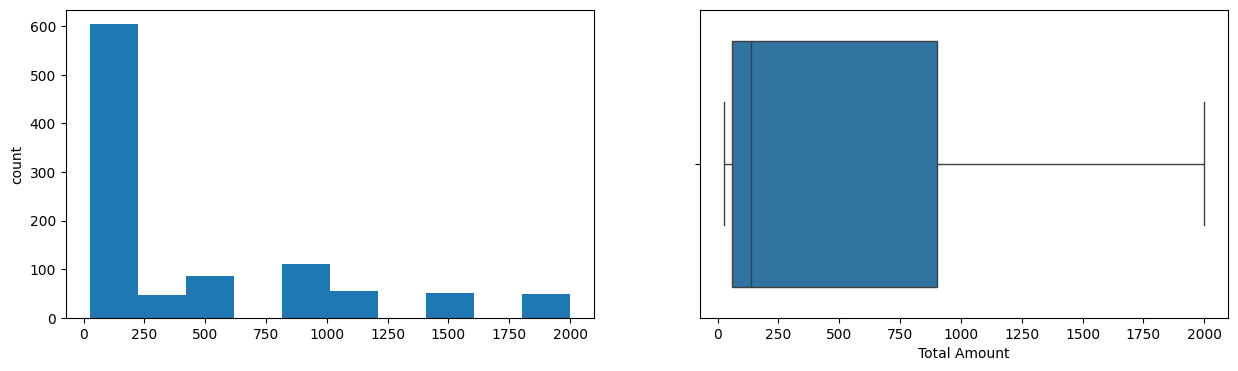

In [ ]:
cols=['Transaction ID','Age','Quantity','Price per Unit','Total Amount']

for col in cols:
    print(col)
    print('Skew :', round(df_train[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_train[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train[col])
    plt.show()

#Time Series Analysis

In [ ]:
df1=df_train.copy()
df1.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Convert the 'date_column' to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract the month and create a new column 'month_column'
df1['Month'] = df1['Date'].dt.month

print(df1)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  Month  
0           3              50     

In [ ]:
# Convert the 'date_column' to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract the month and create a new column 'month_column'
df1['Year'] = df1['Date'].dt.year

print(df1)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  Month  Year  
0           3              5

In [ ]:
# Convert the 'date_column' to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract the month and create a new column 'month_column'
df1['Day'] = df1['Date'].dt.day

print(df1)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  Month  Year  Day  
0           3          

In [ ]:
from datetime import datetime, timedelta

# Generate a date range for a month
date_range = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')

# Randomly generate sales data for each day
np.random.seed(42)  # For reproducible results
sales_data = np.random.randint(100, 1000, size=len(date_range))

# Create a DataFrame
daily_sales_df = pd.DataFrame({
    'Date': date_range,
    'Sales': sales_data
})

# Optional: Set the 'Date' as the index
daily_sales_df.set_index('Date', inplace=True)

# Display the DataFrame
print(daily_sales_df)

            Sales
Date             
2023-01-01    202
2023-01-02    535
2023-01-03    960
2023-01-04    370
2023-01-05    206
...           ...
2024-12-27    466
2024-12-28    243
2024-12-29    984
2024-12-30    168
2024-12-31    198

[731 rows x 1 columns]


In [ ]:
#Convert Date column to Datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [ ]:
#Setting 'date' as index
df_train.set_index('Date', inplace=True)

In [ ]:
#Dealing with missing values
df_train= df_train.fillna(method='ffill')

<ipython-input-24-5a2abc26a2aa>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train= df_train.fillna(method='ffill')


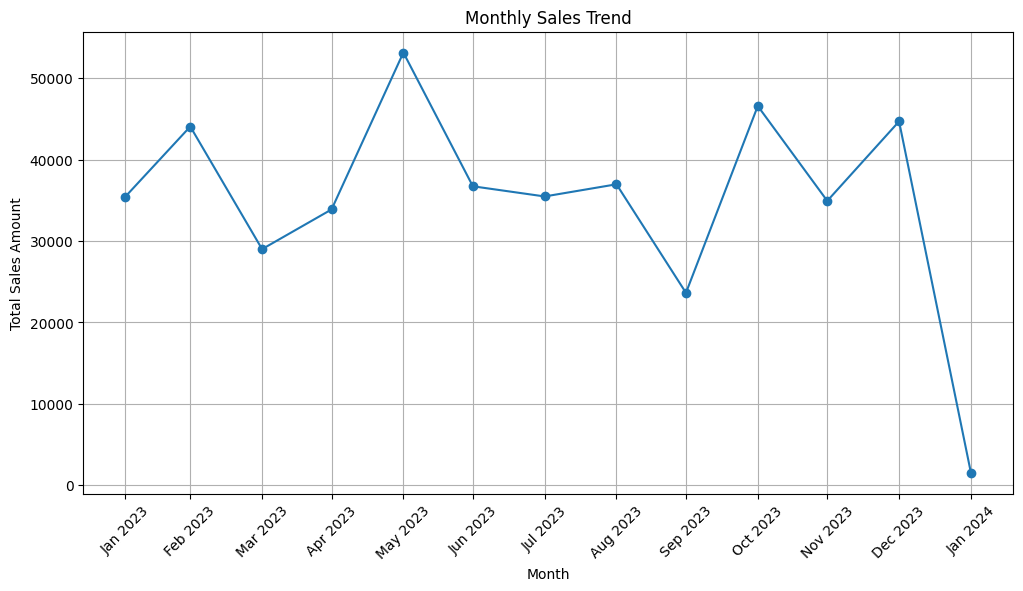

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_train' is the correct DataFrame with 'Date' as index
monthly_sales = df_train.resample('M')['Total Amount'].sum()  # Use df_train instead of retail

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index,
           labels=[month.strftime('%b %Y') for month in monthly_sales.index],
           rotation=45)
plt.grid(True)
plt.show()

Total sales experienced a notable decline in September 2023, whereas there was a marked increase in sales during May 2023.

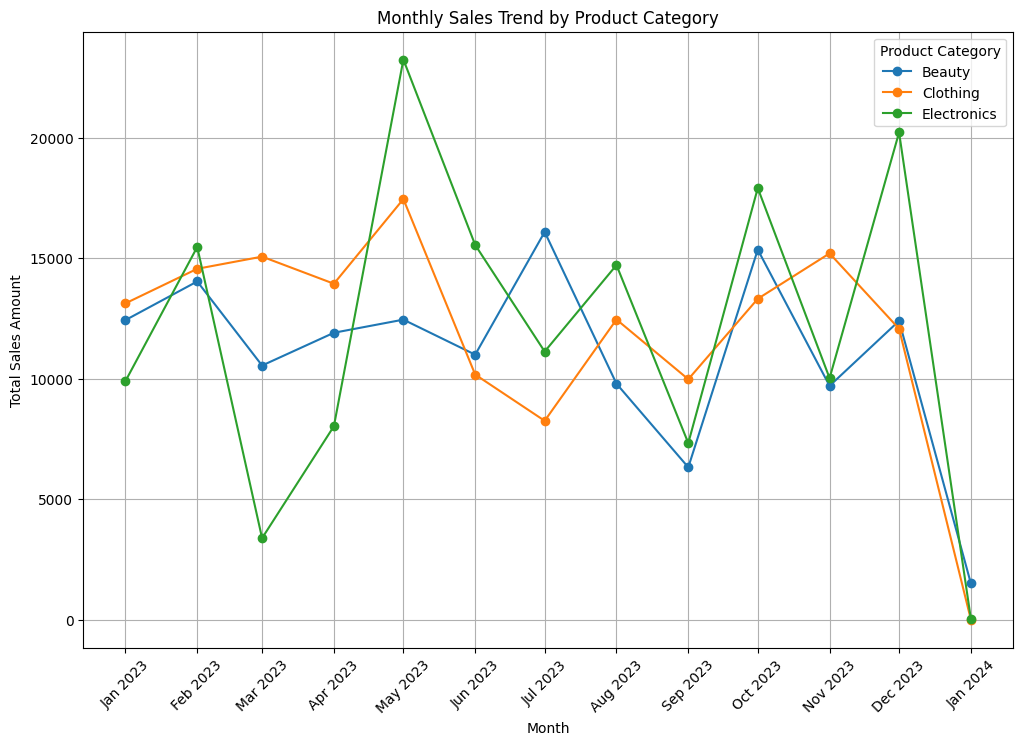

In [ ]:
monthly_category_sales = df_train.groupby([df_train.index.to_period('M'), 'Product Category'])['Total Amount'].sum().reset_index()

pivot_table = monthly_category_sales.pivot(index='Date', columns='Product Category', values='Total Amount').fillna(0)

plt.figure(figsize=(12, 8))
for category in pivot_table.columns:
    plt.plot(pivot_table.index.to_timestamp(), pivot_table[category], marker='o', label=category)  # Convert index to timestamp for better plotting

plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category')
plt.grid(True)
plt.xticks(ticks=pivot_table.index.to_timestamp(), labels=[date.strftime('%b %Y') for date in pivot_table.index.to_timestamp()], rotation=45)  # Convert index to timestamp and format the labels
plt.show()

In May 2023, both Electronics and Clothing saw peak sales, while Beauty sales remained steady. However, in September 2023, all three categories underperformed, with Beauty sales reaching an all-time low, indicating a possible negative factor affecting sales.

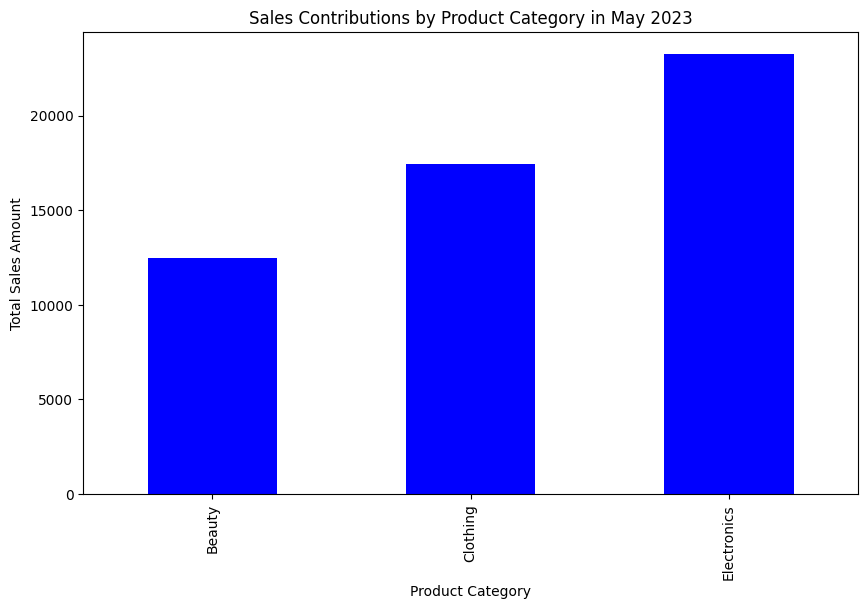

The total sales in the month of May is: 53150


In [ ]:
start_date = '2023-05-01'
end_date = '2023-05-31'
# Use the index to filter the DataFrame
data_may = df_train[(df_train.index >= start_date) & (df_train.index <= end_date)]

category_sales_highest_month = data_may.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_highest_month.plot(kind='bar', color='blue')
plt.title('Sales Contributions by Product Category in May 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_may = data_may['Total Amount'].sum()
print(f'The total sales in the month of May is: {total_sales_may}')

Electronics contributed the maximum sales amount in the max sales month.

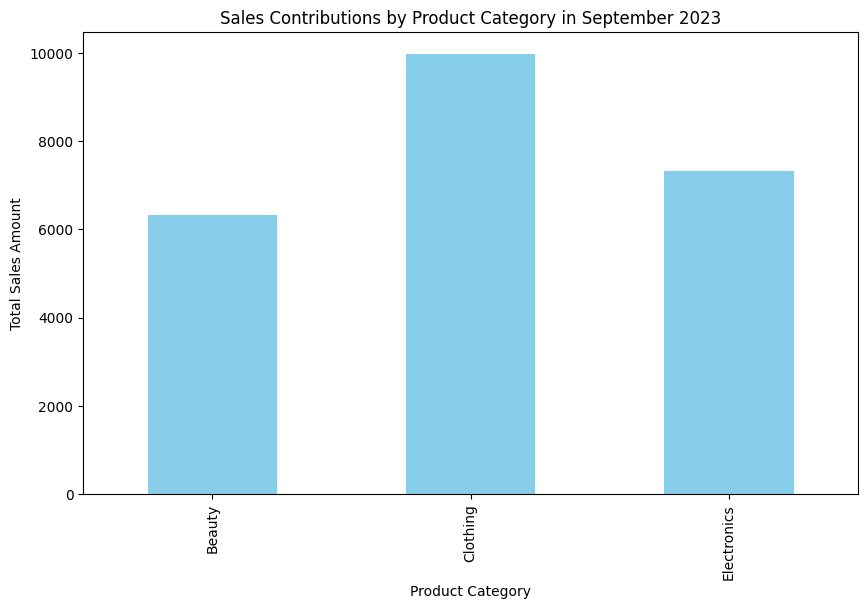

The total sales in the month of September is: 23620


In [ ]:
start_date = '2023-09-01'
end_date = '2023-09-30'

# Use the index to filter the DataFrame if 'Date' is the index
data_september = df_train[(df_train.index >= start_date) & (df_train.index <= end_date)]

# If 'Date' is a column and not the index, use the following line instead:
# data_september = df_train[(df_train['Date'] >= start_date) & (df_train['Date'] <= end_date)]

category_sales_september = data_september.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_september.plot(kind='bar', color='skyblue')
plt.title('Sales Contributions by Product Category in September 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_september = data_september['Total Amount'].sum()
print(f"The total sales in the month of September is: {total_sales_september}")

Beauty was sold the least in the least sold month

In [ ]:
# Check if 'Date' or a similar column exists in the DataFrame
print(df_train.columns)


date_count = df_train.groupby('Date')['Transaction ID'].count()
max_count_date = date_count.idxmax()
print(f"The date with the highest number of transactions is {max_count_date} with {date_count[max_count_date]} transactions.")

Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
The date with the highest number of transactions is 2023-05-16 00:00:00 with 11 transactions.


On 16th May, 2023 the highest number of transactions occurred.

Text(0.5, 1.0, 'Number of Transactions by Day')

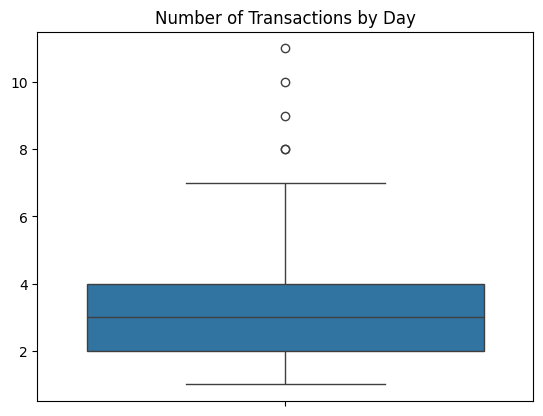

In [ ]:
sns.boxplot(y=date_count.values).set_title('Number of Transactions by Day')

Given that most transactions per day ranged from 2 to 4, the unusually high number of transactions on May 16th stood out as a significant anomaly.

# Customer and Product Analysis

<Axes: >

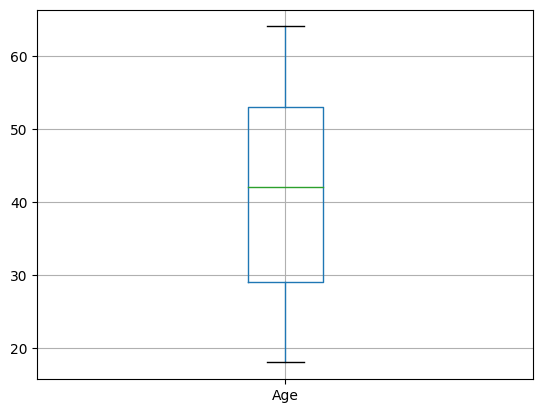

In [ ]:
df_train.boxplot(column='Age',showfliers=True)

Age Distribution: The average age of shoppers is 41, with 75% being 53 years old or younger. The median age is 42.


In [ ]:
unique = df_train['Product Category'].unique()
for category in unique:
  print(category)

Beauty
Clothing
Electronics


Text(0.5, 1.0, 'Age distribution by product category')

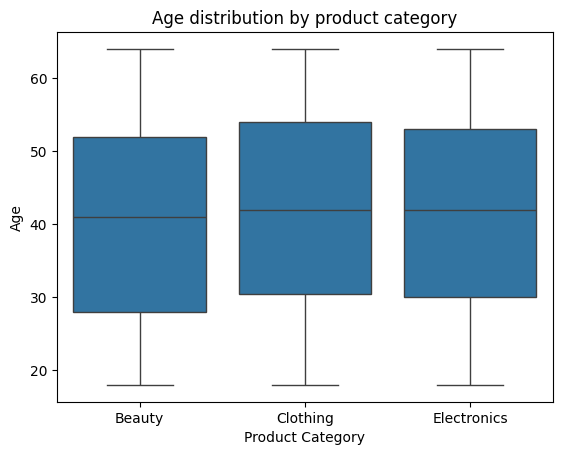

In [ ]:
sns.boxplot(x=df_train['Product Category'],y=df_train['Age'],data=df_train).set_title('Age distribution by product category')

The age distribution of customers remains fairly consistent across different product categories.

Text(0.5, 1.0, 'Age distribution by Gender')

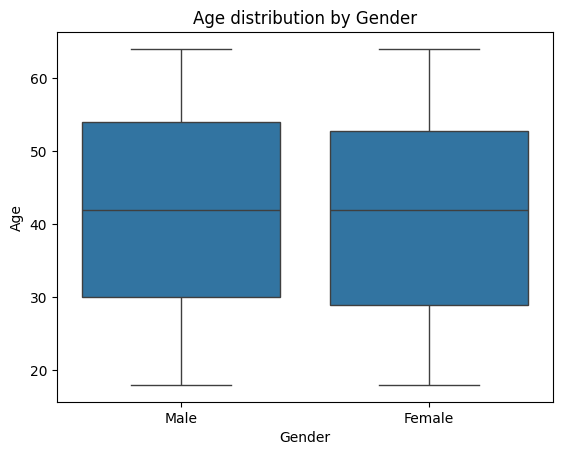

In [ ]:
sns.boxplot(x=df_train['Gender'],y=df_train['Age'],data=df_train).set_title('Age distribution by Gender')

The age distribution of customers remains relatively constant regardless of gender.

In [ ]:
print("Number of records based on gender in percentage: ",df_train['Gender'].value_counts()/len(df_train['Gender']))

Number of records based on gender in percentage:  Gender
Female    0.51
Male      0.49
Name: count, dtype: float64


The number of transactions is evenly distributed between male and female customers, indicating that there is no gender bias in the purchasing history at the retail outlet.

In [ ]:
print(df_train['Total Amount'].max())
print(df_train['Total Amount'].min())

2000
25


The smallest total transaction amount recorded was 25, while the largest was 2000.

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

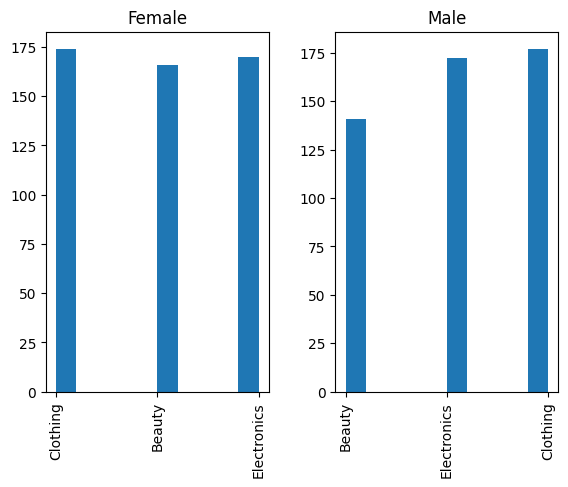

In [ ]:
df_train.hist(column='Product Category',by='Gender')

The histogram for females indicates no notable preference for different product categories, whereas for males, there is a significantly lower preference for beauty products.

<Axes: xlabel='Gender'>

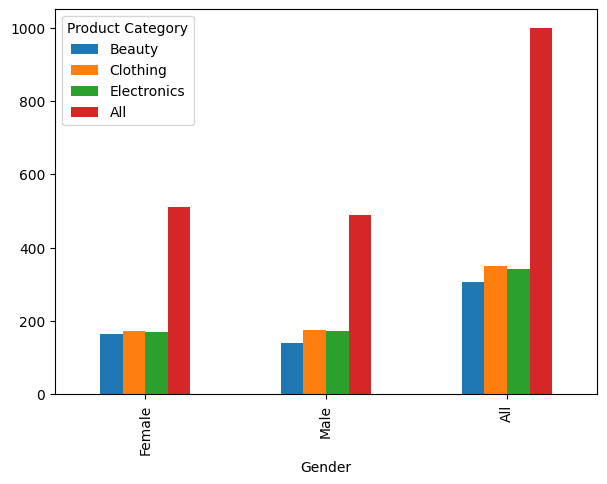

In [ ]:
pd.crosstab(df_train['Gender'],df_train['Product Category'],margins=True).plot(kind='bar',figsize=(7,5))

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


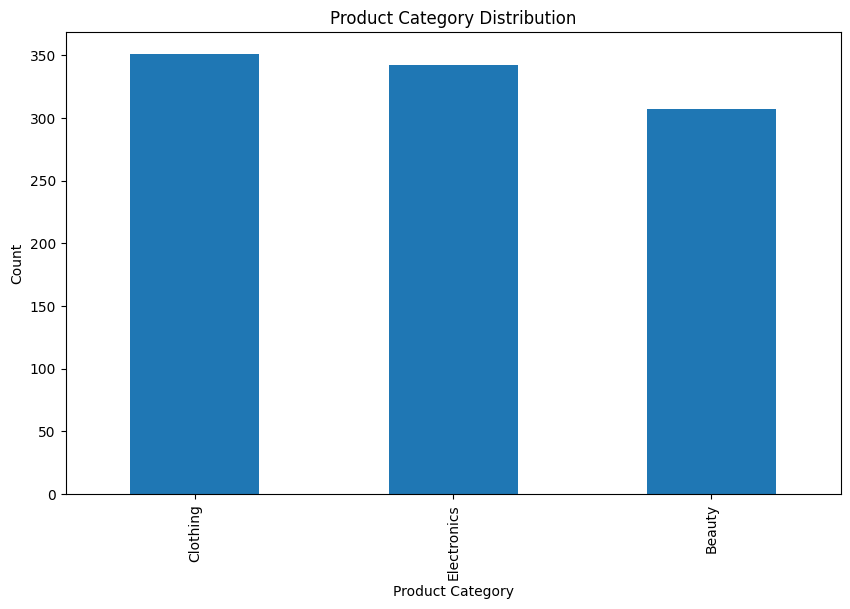

In [ ]:
product_category_distribution = df_train['Product Category'].value_counts()
print(product_category_distribution)

product_category_distribution.plot(kind='bar', figsize=(10, 6), title='Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

It is clear that clothing products generate more transactions than beauty products, which have fewer transactions. However, clothing and electronics both experience similarly high transaction volumes, with no significant difference between the two categories.

Gender
Female    510
Male      490
Name: count, dtype: int64


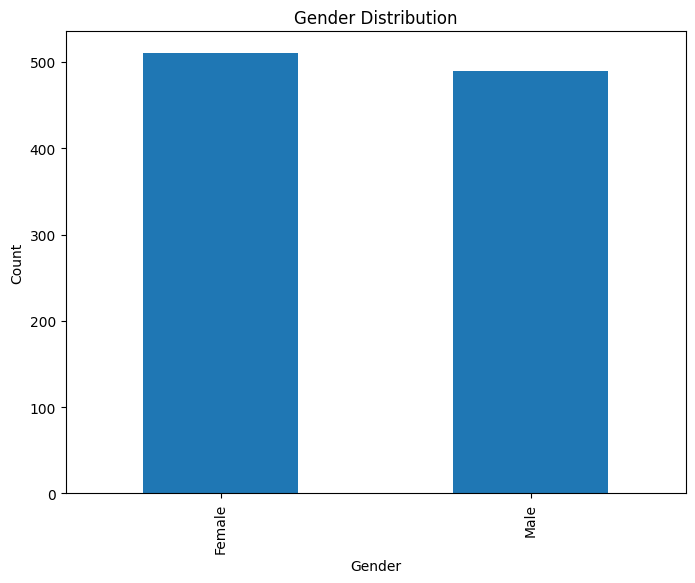

In [ ]:
gender_distribution = df_train['Gender'].value_counts()
print(gender_distribution)

gender_distribution.plot(kind='bar', figsize=(8, 6), title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The number of male and female customers is nearly equal, with males slightly surpassing females at 510 compared to 490.

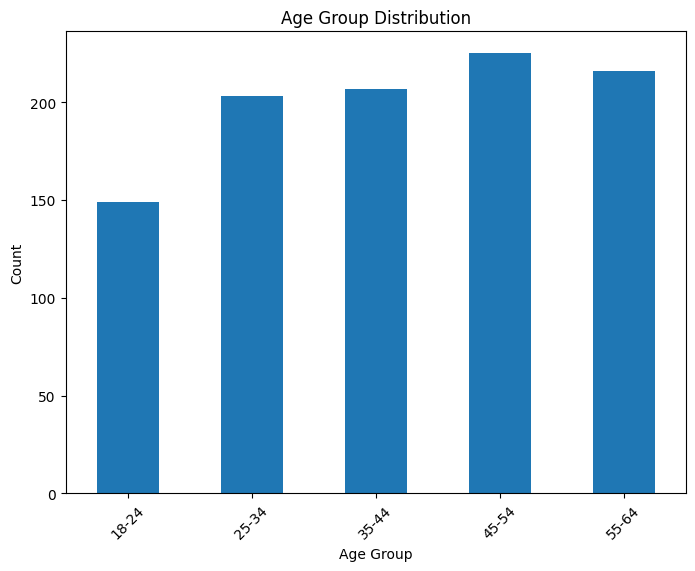

In [ ]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df_train['Age Group'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels, right=False)

age_distribution = df_train['Age Group'].value_counts().sort_index()

age_distribution.plot(kind='bar', figsize=(8, 6), title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The graph reveals that the largest number of shoppers falls within the 45-54 age group, whereas the 18-24 age group has the fewest shoppers.

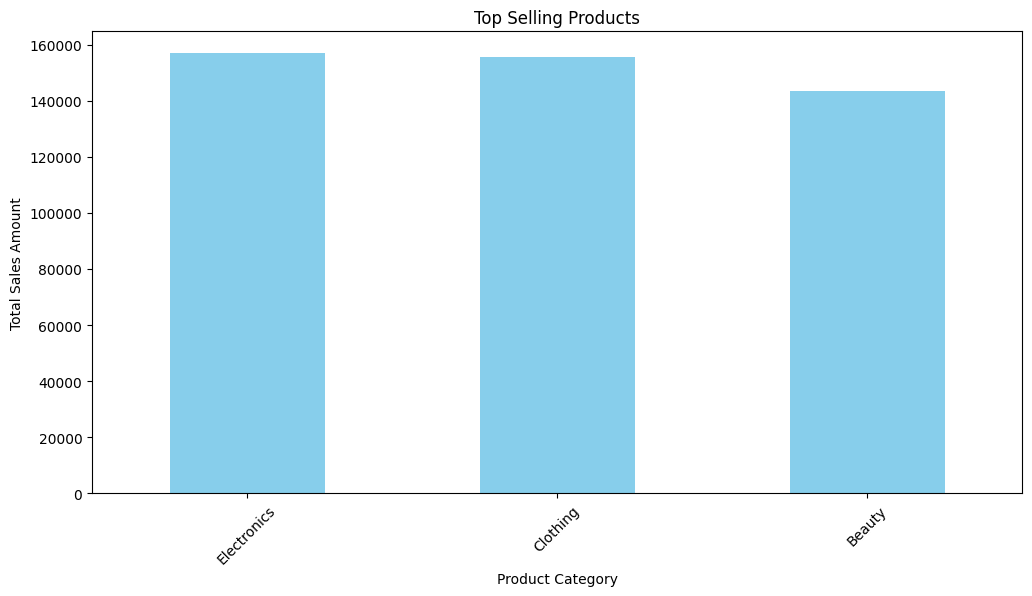

In [ ]:
# Top Selling Products
top_selling_products = df_train.groupby('Product Category')['Total Amount'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

Electronics generated the highest revenue, followed closely by clothing, though the difference between them is not substantial. Beauty, on the other hand, generated the lowest revenue of the three categories.

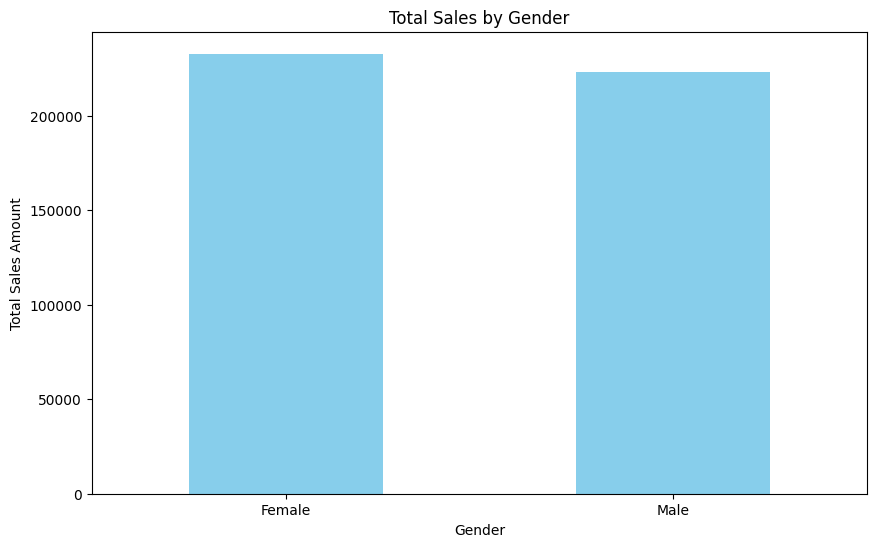

In [ ]:
# Customer Gender Analysis
gender_sales = df_train.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
gender_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.show()

This implies that females tend to spend more compared to males.

In [ ]:
print(df_train.columns)  # Print the available columns to verify the correct date column name
daily_sales_df = pd.DataFrame({
    'Date': date_range,
    'Sales': sales_data
})

# Use the sort_values method to sort the DataFrame
df_train_ = df_train.sort_values(by='Total Amount', ascending=False)
print(df_train_[['Customer ID','Total Amount','Product Category']].head(5))

Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount', 'Age Group'],
      dtype='object')
           Customer ID  Total Amount Product Category
Date                                                 
2023-04-20     CUST572          2000         Clothing
2023-10-01     CUST089          2000      Electronics
2023-10-25     CUST503          2000           Beauty
2023-05-27     CUST561          2000         Clothing
2023-09-11     CUST832          2000           Beauty


The top 5 customers, ranked by total amount spent and who have not made a purchase, are listed above along with their preferred product categories.

# Recommendations


Recommendations Based on Age:
Focus on customers aged 29-53:

Ages 29-34: Promote clothing.
Ages 34-53: Offer all product categories.
Women aged 35-44: Target items priced $0-$250.
Ages 45-54: Consider marketing all categories based on strategy.


Recommendations Based on Time Series:
Boosting Revenue in May: Take advantage of the peak sales in May, particularly on May 16, by concentrating marketing efforts on electronics first and then on clothing.

Handling Sales Decline: Examine and tackle the drop in clothing sales and the overall sales downturn in September.


Recommendations Based on Gender:
Beauty Products for Women: Offer higher-priced beauty products to increase revenue from female customers, who often buy these items.

Product Category Insights:

Revenue by Category: Electronics lead in revenue, followed by clothing, while beauty products contribute the least.
Beauty Product Purchase Trends: The highest total revenue for beauty products occurs when customers buy two items, with revenue dropping significantly for higher quantities.
Pricing and Quantity Trends: Products priced between $0-$100 are purchased in larger quantities but generate less revenue. Items priced between $150-$200 are bought most often.

Recommendations Based on Product Category:
To increase revenue, focus on higher-priced beauty products for female customers. Electronics lead in revenue, with clothing following, while beauty products contribute the least. Beauty products generate the most revenue when bought in pairs, with a notable drop for larger quantities. Items priced between $0-$100 sell in greater numbers but contribute less to revenue, whereas products priced between $150-$200 are purchased most frequently.


Recommendations Based on Customer Behavior:
Addressing Churn Risks: Use personalized marketing strategies to reconnect with customers by focusing on their preferred product categories.





